# Deep Learning Assignment - (July 2023)
Title: <ins>Brain Tumor Classification using Proposed CNN Architecture</ins>  
Name: Dennis Lim  
 



## Importing necessary packages and mount GDrive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os, shutil

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import  plot_model
from keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Loading image dataset

In [3]:
# loading dataset with train-validation split
train_data_dir = "/content/drive/My Drive/Colab Notebooks/Assignment/Data"
batch_size = 32
target_size = (256, 256)
validation_split = 0.2
train = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

validation = keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)

Found 3096 files belonging to 4 classes.
Using 2477 files for training.
Found 3096 files belonging to 4 classes.
Using 619 files for validation.


In [ ]:
validation.class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

## Data Visualization

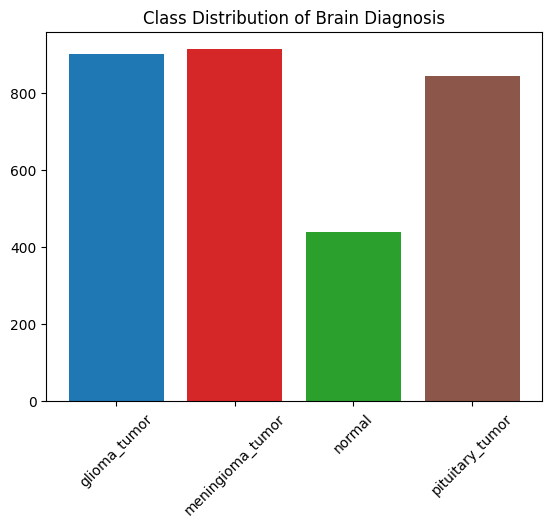

In [ ]:
# file directory
glioma_files = os.listdir(train_data_dir + "/glioma_tumor")
meningioma_files = os.listdir(train_data_dir + "/meningioma_tumor")
normal_files = os.listdir(train_data_dir + "/normal")
pituitary_files = os.listdir(train_data_dir + "/pituitary_tumor")

data = [len(glioma_files), len(meningioma_files), len(normal_files),len(pituitary_files)]
keys = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

# class distribution plot
plt.title("Class Distribution of Brain Diagnosis")
plt.bar(keys, data, color=["tab:blue", "tab:red", "tab:green", "tab:brown"])
plt.xticks(rotation = 45);

Shape of the image in one batch is: (32, 256, 256, 3)
Total labels contained in one batch: (32,)
Visualise the single image in form of tensors: 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


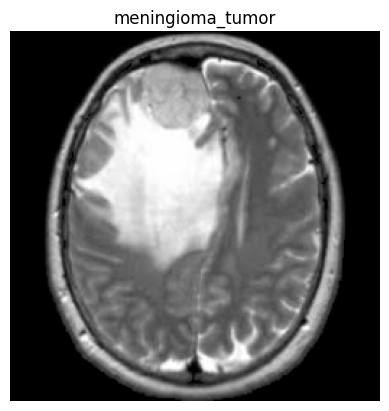

In [ ]:
# check the shape and label of single image in first batch of training data
for image, label in train.take(1):
    print(f"Shape of the image in one batch is: {image.shape}")
    print(f"Total labels contained in one batch: {label.shape}")
    print(f"Visualise the single image in form of tensors: \n{image[0]}")
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(train.class_names[label[0]])
    plt.axis("off")

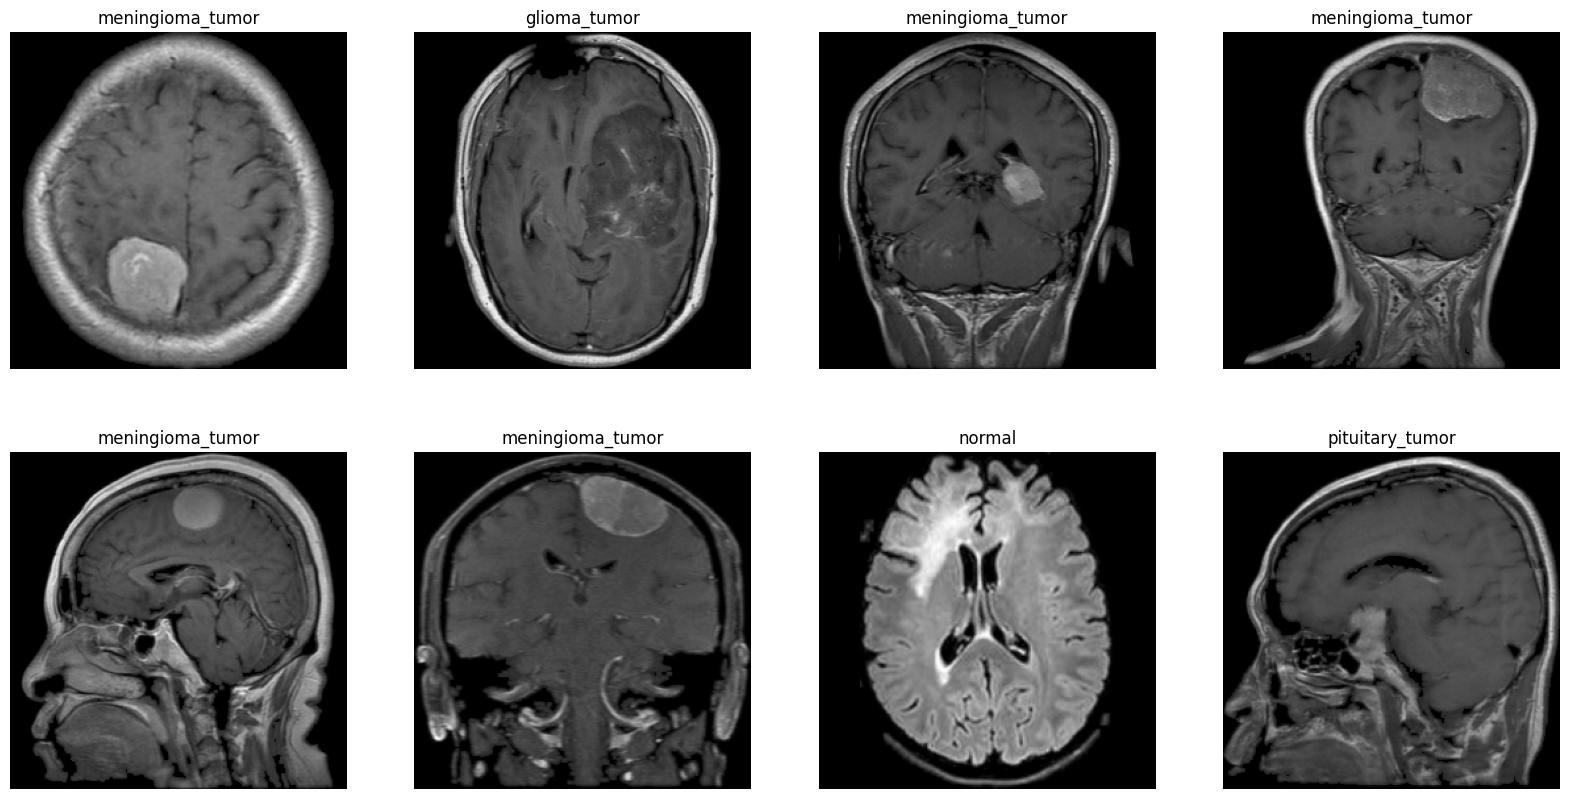

In [ ]:
# sample of images in train dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])
    plt.axis(False)

## Model Initialization

### Baseline Model

In [ ]:
# initialize sequential model
model = keras.models.Sequential()

# Convolutional layer 1 with ReLU activation and input shape (256,256,3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to reshape data to 1D
model.add(Flatten(name='flattened'))

# Fully-connected Layers
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model Summary (Baseline Model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

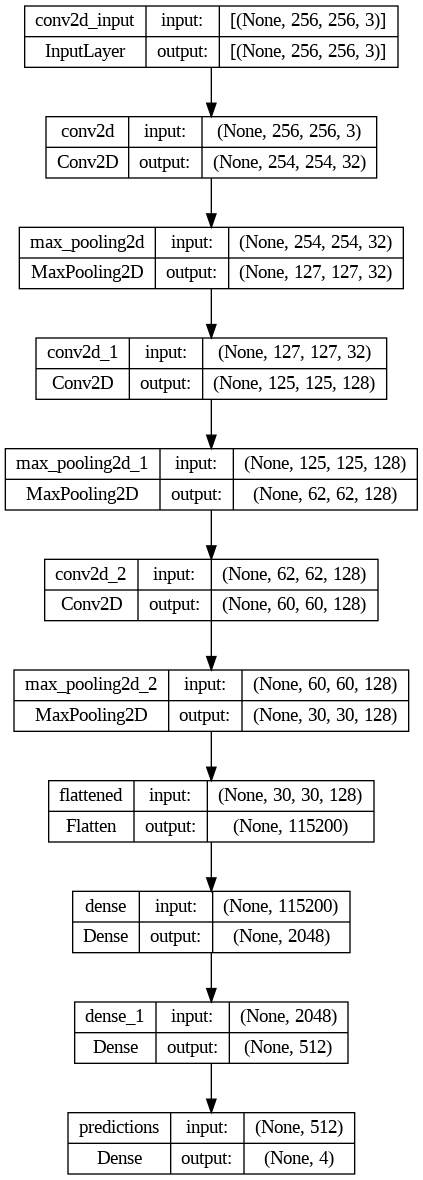

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Model Training (Baseline Model)

In [ ]:
history = model.fit(
      train,
      epochs=30,
      validation_data=validation
      )

Epoch 1/30
78/78 [==============================] - 447s 6s/step - loss: 106.9667 - accuracy: 0.3751 - val_loss: 1.1244 - val_accuracy: 0.5105
Epoch 2/30
78/78 [==============================] - 14s 173ms/step - loss: 0.9794 - accuracy: 0.5813 - val_loss: 0.7506 - val_accuracy: 0.7060
Epoch 3/30
78/78 [==============================] - 13s 155ms/step - loss: 0.5852 - accuracy: 0.7703 - val_loss: 0.4844 - val_accuracy: 0.8239
Epoch 4/30
78/78 [==============================] - 13s 159ms/step - loss: 0.3331 - accuracy: 0.8712 - val_loss: 0.3537 - val_accuracy: 0.8853
Epoch 5/30
78/78 [==============================] - 12s 156ms/step - loss: 0.1988 - accuracy: 0.9342 - val_loss: 0.4369 - val_accuracy: 0.8498
Epoch 6/30
78/78 [==============================] - 12s 155ms/step - loss: 0.1508 - accuracy: 0.9479 - val_loss: 0.3163 - val_accuracy: 0.9257
Epoch 7/30
78/78 [==============================] - 13s 156ms/step - loss: 0.0782 - accuracy: 0.9742 - val_loss: 0.3954 - val_accuracy: 0.9095

Model Evaluation (Baseline Model)

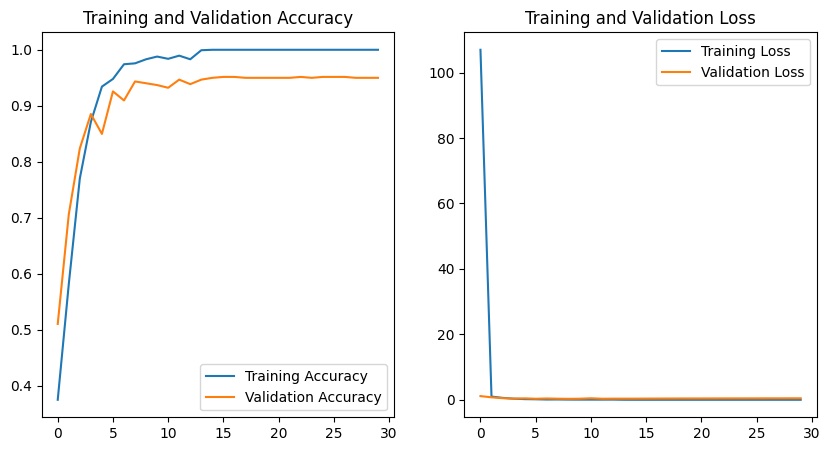

In [ ]:
# Baseline model accuracy and loss line plot
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Classification report for baseline model
import numpy as np
from sklearn.metrics import classification_report
X_val, y_val =[], []
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())

y_pred = []
predictions = model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))

report = classification_report(y_val, y_pred)
print(report)

20/20 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       194
           1       0.96      0.91      0.93       181
           2       0.96      0.96      0.96        81
           3       0.96      0.98      0.97       163

    accuracy                           0.95       619
   macro avg       0.95      0.95      0.95       619
weighted avg       0.95      0.95      0.95       619



## Transfer Learning

In [ ]:
from keras.applications.vgg16 import VGG16

# vgg16 model
vgg16 = VGG16(include_top=False,
              weights='imagenet',
              input_shape=(256,256,3),
              pooling=None)

# freeze all layers in VGG
for layer in vgg16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# initialize sequential model
model = keras.models.Sequential()

# add vgg16 model initialized above
model.add(vgg16)

# add the fully-connected layers atop the transfer learning model:
model.add(Flatten(name='flattened'))
model.add(Dropout(0.5, name='dropout1'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5, name='dropout2'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3, name='dropout3'))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model Summary (Transfer Learning)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flattened (Flatten)         (None, 32768)             0         
                                                                 
 dropout1 (Dropout)          (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 4096)              134221824 
                                                                 
 dropout2 (Dropout)          (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout3 (Dropout)          (None, 1024)             

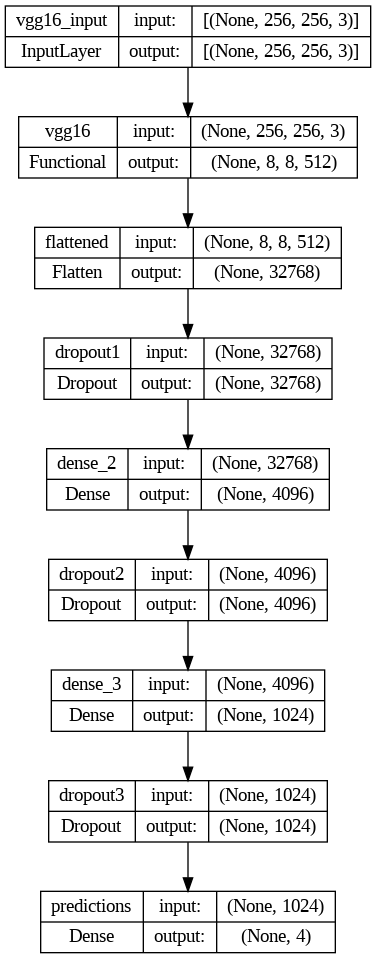

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Model Training (Transfer Learning)

In [ ]:
history = model.fit(
      train,
      epochs=30,
      validation_data=validation
      )

Epoch 1/30
78/78 [==============================] - 33s 314ms/step - loss: 33.0688 - accuracy: 0.5575 - val_loss: 0.5094 - val_accuracy: 0.8029
Epoch 2/30
78/78 [==============================] - 20s 247ms/step - loss: 1.2631 - accuracy: 0.7360 - val_loss: 0.3722 - val_accuracy: 0.8788
Epoch 3/30
78/78 [==============================] - 21s 264ms/step - loss: 0.7342 - accuracy: 0.7977 - val_loss: 0.3000 - val_accuracy: 0.9031
Epoch 4/30
78/78 [==============================] - 19s 244ms/step - loss: 0.6012 - accuracy: 0.8397 - val_loss: 0.3279 - val_accuracy: 0.8481
Epoch 5/30
78/78 [==============================] - 20s 248ms/step - loss: 0.4433 - accuracy: 0.8664 - val_loss: 0.2219 - val_accuracy: 0.9047
Epoch 6/30
78/78 [==============================] - 19s 245ms/step - loss: 0.4803 - accuracy: 0.8773 - val_loss: 0.1441 - val_accuracy: 0.9612
Epoch 7/30
78/78 [==============================] - 19s 244ms/step - loss: 0.3537 - accuracy: 0.9031 - val_loss: 0.1600 - val_accuracy: 0.948

Model Evaluation (Transfer Learning)

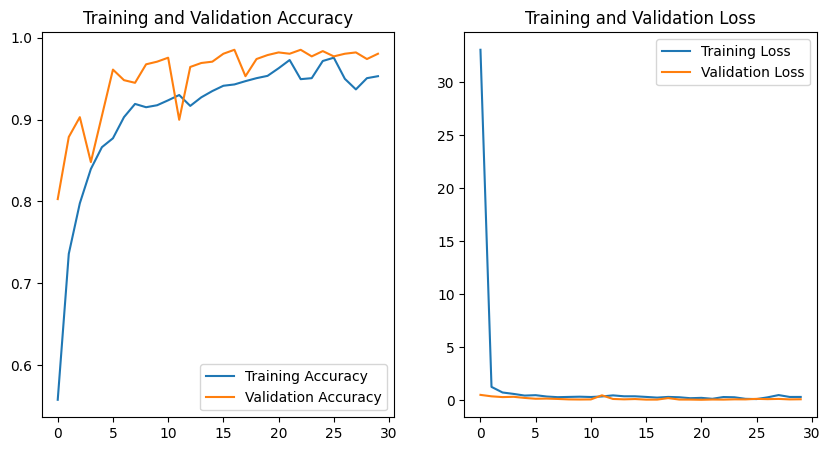

In [ ]:
# Transfer learning model accuracy and loss line graph
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Classification report for transfer learning model
import numpy as np
from sklearn.metrics import classification_report
X_val, y_val =[], []
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())

y_pred = []
predictions = model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))

report = classification_report(y_val, y_pred)
print(report)

20/20 [==============================] - 3s 163ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       194
           1       1.00      0.94      0.97       181
           2       0.94      1.00      0.97        81
           3       0.99      1.00      0.99       163

    accuracy                           0.98       619
   macro avg       0.98      0.98      0.98       619
weighted avg       0.98      0.98      0.98       619



## Hyperparameter Tuning

In [4]:
# initialize sequential model
model = keras.models.Sequential()

# Convolutional layer 1 with ReLU activation and input shape (256,256,3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 4 with ReLU activation
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to reshape data to 1D
model.add(Flatten(name='flattened'))

# Fully-connected layers
model.add(Dropout(0.5, name='dropout1'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5, name='dropout2'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3, name='dropout3'))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model Summary (Fine-Tuned)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

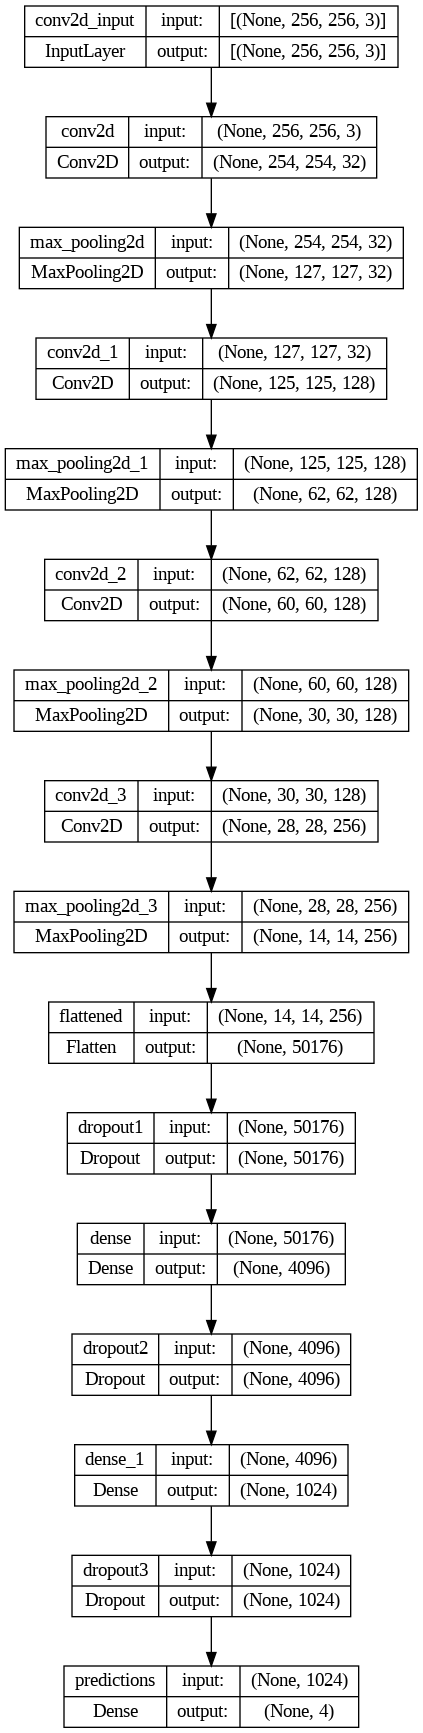

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

Model Training (Fine-Tuned)

In [5]:
callback = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.2, min_lr=0.0001, verbose=1)

history = model.fit(
      train,
      epochs=50,
      validation_data=validation,
      callbacks = [callback, lr_reduction]
      )

Epoch 1/50
78/78 [==============================] - 519s 6s/step - loss: 24.1735 - accuracy: 0.4009 - val_loss: 1.1785 - val_accuracy: 0.4523 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 12s 152ms/step - loss: 1.1917 - accuracy: 0.4808 - val_loss: 1.8465 - val_accuracy: 0.3506 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 13s 163ms/step - loss: 1.1337 - accuracy: 0.5079 - val_loss: 0.9990 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 13s 164ms/step - loss: 1.0144 - accuracy: 0.5587 - val_loss: 0.9440 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - 13s 164ms/step - loss: 0.9484 - accuracy: 0.5914 - val_loss: 0.8219 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - 13s 165ms/step - loss: 0.9127 - accuracy: 0.6072 - val_loss: 0.8149 - val_accuracy: 0.6575 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - 13s 163ms/ste

Model Evaluation (Fine-Tuned)

In [6]:
# evaluation using the best model weights
model.evaluate(validation)

20/20 [==============================] - 1s 48ms/step - loss: 0.1105 - accuracy: 0.9774


[0.11050138622522354, 0.9773828983306885]

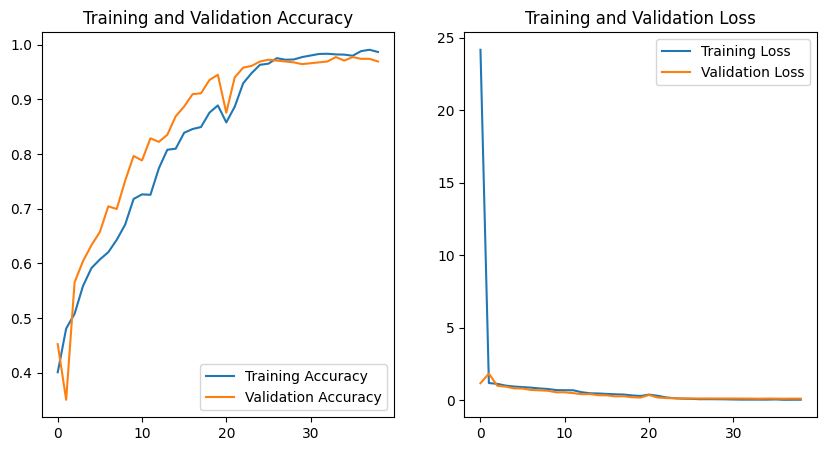

In [7]:
# Fine-Tuned model accuracy and loss line graph
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
# Classification report for fine-tuned model
import numpy as np
from sklearn.metrics import classification_report
X_val, y_val =[], []
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())

y_pred = []
predictions = model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))

report = classification_report(y_val, y_pred)
print(report)

20/20 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       194
           1       0.99      0.96      0.97       181
           2       0.98      0.98      0.98        81
           3       0.97      0.99      0.98       163

    accuracy                           0.98       619
   macro avg       0.98      0.98      0.98       619
weighted avg       0.98      0.98      0.98       619

